In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

In [ ]:
def split_sequence(sequence, n_steps):
  x = list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence) - 1:
      break
    seq_x = sequence[i:end_ix]
    x.append(seq_x)
  return np.array(x)

In [ ]:
name1 = 'GOOG'
name2 = 'AMZN'
n_steps = 50

data1 = pd.read_csv(name1 + '.csv')
data1 = data1.iloc[:,1:2].values
y1_real = data1[n_steps:]
scaler1 = MinMaxScaler()
scaled_data1 = scaler1.fit_transform(data1)
X1 = split_sequence(scaled_data1, n_steps)
y1 = scaled_data1[n_steps:]

data2 = pd.read_csv(name2 + '.csv')
data2 = data2.iloc[:,1:2].values
y2_real = data2[n_steps:]
scaler2 = MinMaxScaler()
scaled_data2 = scaler2.fit_transform(data2)
X2 = split_sequence(scaled_data2, n_steps)
y2 = scaled_data2[n_steps:]


In [ ]:
X1_train = X1[0:1259]
y1_train = y1[0:1259]
real_y1_train = y1_real[0:1259]
X1_test = X1[1260:]
y1_test = y1[1260:]
real_y1_test = y1_real[1260:]

X2_train = X2[0:1259]
y2_train = y2[0:1259]
real_y2_train = y2_real[0:1259]
X2_test = X2[1260:]
y2_test = y2[1260:]
real_y2_test = y2_real[1260:]

X_train = np.dstack((X1_train, X2_train))
y_train = np.concatenate((y1_train, y2_train), axis=1)
X_test = np.dstack((X1_test, X2_test))
y_test = np.concatenate((y1_test, y2_test), axis=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1259, 50, 2)
(1259, 2)
(201, 50, 2)
(201, 2)


In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(50, 2), activation='sigmoid'))
model.add(Dense(units=2))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 1s 20ms/step - loss: 0.1543
Epoch 2/200
40/40 [==============================] - 1s 20ms/step - loss: 0.0250
Epoch 3/200
40/40 [==============================] - 1s 20ms/step - loss: 0.0219
Epoch 4/200
40/40 [==============================] - 1s 20ms/step - loss: 0.0193
Epoch 5/200
40/40 [==============================] - 1s 20ms/step - loss: 0.0166
Epoch 6/200
40/40 [==============================] - 1s 20ms/step - loss: 0.0140
Epoch 7/200
40/40 [==============================] - 1s 19ms/step - loss: 0.0112
Epoch 8/200
40/40 [==============================] - 1s 19ms/step - loss: 0.0087
Epoch 9/200
40/40 [==============================] - 1s 19ms/step - loss: 0.0063
Epoch 10/200
40/40 [==============================] - 1s 18ms/step - loss: 0.0042
Epoch 11/200
40/40 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 12/200
40/40 [==============================] - 1s 20ms/step - loss: 0.0016
Epoch 13/200
40/40 [=====

In [ ]:
predicted_y_test = model.predict(X_test)
predicted_y1_test = predicted_y_test[:,[0]]
predicted_y2_test = predicted_y_test[:,[1]]
predicted_y1_test = scaler1.inverse_transform(predicted_y1_test)
predicted_y2_test = scaler2.inverse_transform(predicted_y2_test)

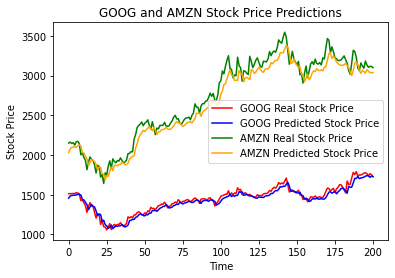

In [ ]:
plt.plot(real_y1_test, color = 'red', label = name1 + ' Real Stock Price')
plt.plot(predicted_y1_test, color = 'blue', label = name1 + ' Predicted Stock Price')
plt.plot(real_y2_test, color = 'green', label = name2 + ' Real Stock Price')
plt.plot(predicted_y2_test, color = 'orange', label = name2 + ' Predicted Stock Price')
plt.title(name1 + ' and ' + name2 + ' Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()